In [10]:
from PIL import Image
import numpy as np
import random
import cv2 as cv
import matplotlib.pyplot as plt
from ImageProcessor import ImageProcessor
import os
import bm3d
from skimage.metrics import structural_similarity as compare_ssim
from skimage.metrics import peak_signal_noise_ratio as compare_psnr

In [11]:
# 读取50张clean jpg图片
image_path = './clean_photos'
ImageProcessor = ImageProcessor(image_path, 50)
ImageProcessor.read_images()

In [12]:
# 随机的噪声污染这些图片
# 现在污染噪声的类型分为三种：椒盐噪声、高斯噪声、泊松噪声；10张图片只添加椒盐噪声，10张图片只添加高斯噪声，10张图片只添加泊松噪声，20张图片添加椒盐噪声、高斯噪声和泊松噪声
for i in range(10):
    salt_prob = random.random() * 0.1
    pepper_prob = random.random() * 0.1
    ImageProcessor.add_salt_pepper_noise(i, salt_prob, pepper_prob)


for i in range(10, 20):
    mean = 0
    sigma = random.uniform(0,20)
    ImageProcessor.add_gaussian_noise(i,mean,sigma)


for i in range(20, 30):
    ImageProcessor.add_poisson_noise(i)


for i in range(30, 50):
    salt_prob = random.random() * 0.1
    pepper_prob = random.random() * 0.1 
    mean = 0
    sigma = random.uniform(0,20)
    ImageProcessor.add_all_noises(i,salt_prob,pepper_prob,mean,sigma)

In [13]:
# 均值滤波降噪
average_filter_result = []
for i in range(50):
    image = ImageProcessor.noisy_images[i]
    image = np.array(image)
    image = cv.blur(image, (5, 5))
    average_filter_result.append(Image.fromarray(image))

# 中值滤波降噪
median_filter_result = []
for i in range(50):
    image = ImageProcessor.noisy_images[i]
    image = np.array(image)
    image = cv.medianBlur(image, 5)
    median_filter_result.append(Image.fromarray(image))

# BM3D降噪
bm3d_filter_result = []
for i in range(50):
    image = ImageProcessor.noisy_images[i]
    image = np.array(image)
    image = bm3d.bm3d_rgb(image, 25)
    image = np.clip(image, 0, 255).astype(np.uint8)
    bm3d_filter_result.append(Image.fromarray(image))

In [14]:
# 进行PSNR分析
average_filter_psnr = []
median_filter_psnr = []
bm3d_filter_psnr = []
for i in range(50):
    average_filter_psnr.append(compare_psnr(np.array(ImageProcessor.clean_images[i]), np.array(average_filter_result[i])))
    median_filter_psnr.append(compare_psnr(np.array(ImageProcessor.clean_images[i]), np.array(median_filter_result[i])))
    bm3d_filter_psnr.append(compare_psnr(np.array(ImageProcessor.clean_images[i]), np.array(bm3d_filter_result[i])))


In [15]:
# 进行SSIM分析
average_filter_ssim = []
median_filter_ssim = []
bm3d_filter_ssim = []
for i in range(50):
    average_filter_ssim.append(compare_ssim(np.array(ImageProcessor.clean_images[i]), np.array(average_filter_result[i]), channel_axis=-1))
    median_filter_ssim.append(compare_ssim(np.array(ImageProcessor.clean_images[i]), np.array(median_filter_result[i]), channel_axis=-1))
    bm3d_filter_ssim.append(compare_ssim(np.array(ImageProcessor.clean_images[i]), np.array(bm3d_filter_result[i]), channel_axis=-1))


/var/folders/c8/5l_w47255q10c1x3mbbq5mvm0000gn/T/ipykernel_10882/2360695957.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([average_filter_psnr[:10], median_filter_psnr[:10], bm3d_filter_psnr[:10],


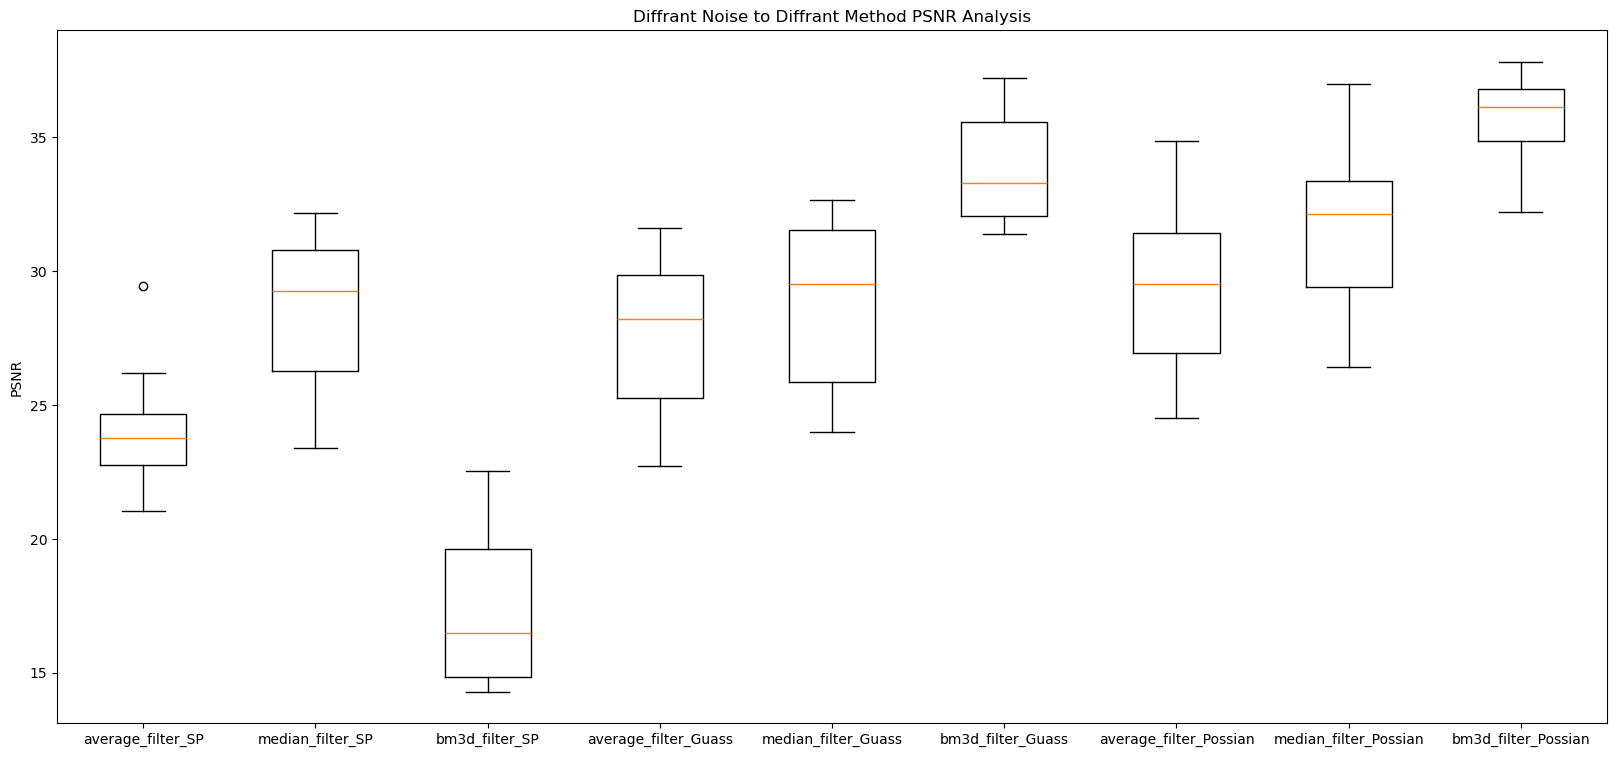

/var/folders/c8/5l_w47255q10c1x3mbbq5mvm0000gn/T/ipykernel_10882/2360695957.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([average_filter_ssim[:10], median_filter_ssim[:10], bm3d_filter_ssim[:10],


<Figure size 640x480 with 0 Axes>

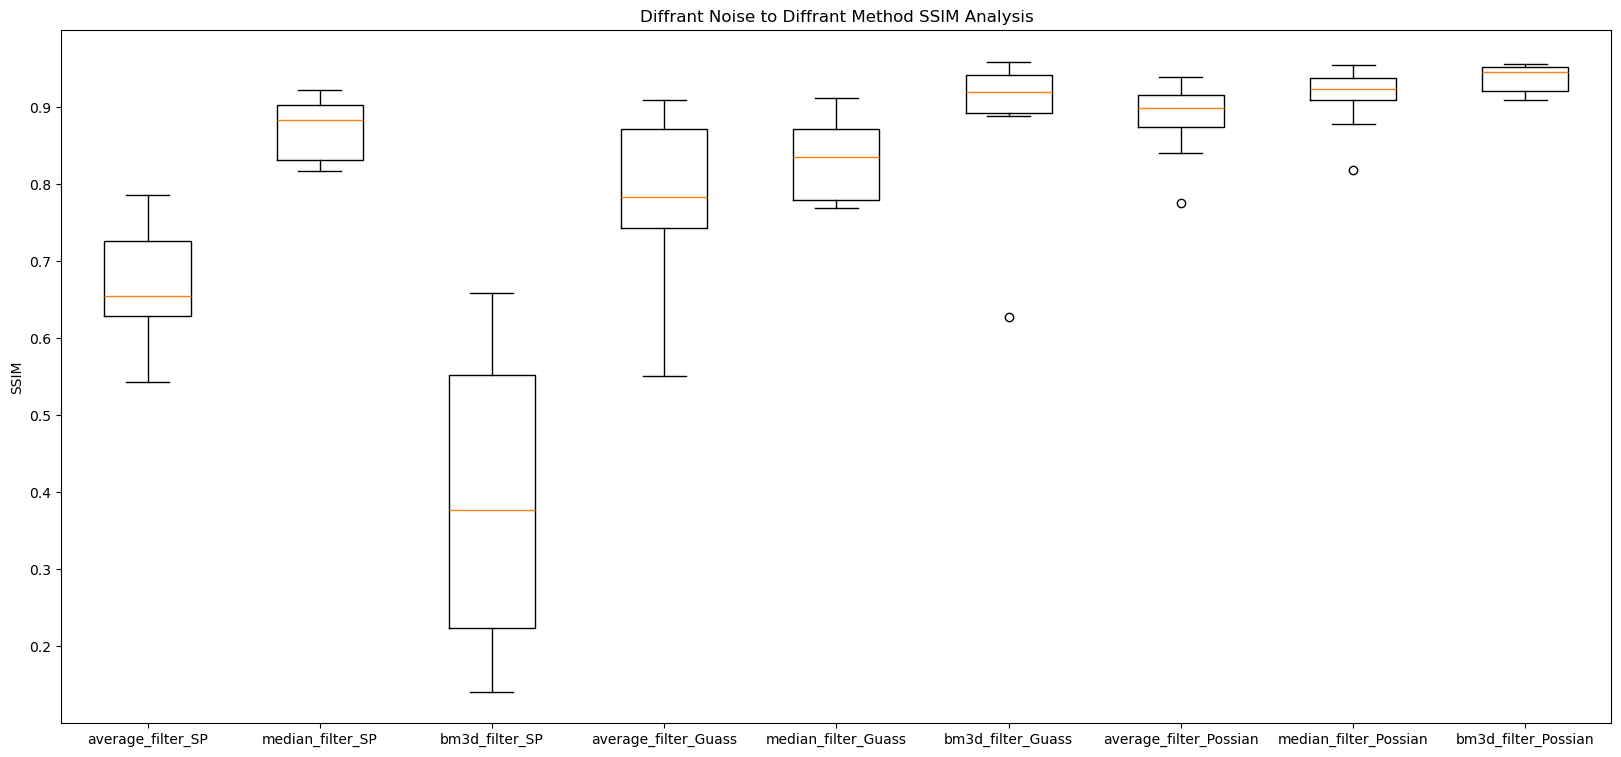

<Figure size 640x480 with 0 Axes>

In [16]:
# 绘图进行不同降噪方法的PSNR和SSIM分析
# 三种噪声的不同降噪方法的PSNR分析
plt.figure(figsize=(20, 9))
plt.boxplot([average_filter_psnr[:10], median_filter_psnr[:10], bm3d_filter_psnr[:10],
            average_filter_psnr[10:20], median_filter_psnr[10:20], bm3d_filter_psnr[10:20],
            average_filter_psnr[20:30], median_filter_psnr[20:30], bm3d_filter_psnr[20:30]],
            labels=['average_filter_SP', 'median_filter_SP', 'bm3d_filter_SP',
                     'average_filter_Guass', 'median_filter_Guass', 'bm3d_filter_Guass',
                     'average_filter_Possian', 'median_filter_Possian', 'bm3d_filter_Possian'])
plt.title('Diffrant Noise to Diffrant Method PSNR Analysis')
plt.ylabel('PSNR')
plt.show()
# 保存图片
plt.savefig('./output/Diffrant Noise to Diffrant Method PSNR Analysis.png')     

# 三种噪声的不同降噪方法的SSIM分析
plt.figure(figsize=(20, 9))
plt.boxplot([average_filter_ssim[:10], median_filter_ssim[:10], bm3d_filter_ssim[:10],
            average_filter_ssim[10:20], median_filter_ssim[10:20], bm3d_filter_ssim[10:20],
            average_filter_ssim[20:30], median_filter_ssim[20:30], bm3d_filter_ssim[20:30]],
            labels=['average_filter_SP', 'median_filter_SP', 'bm3d_filter_SP',
                    'average_filter_Guass', 'median_filter_Guass', 'bm3d_filter_Guass',
                    'average_filter_Possian', 'median_filter_Possian', 'bm3d_filter_Possian'])
plt.title('Diffrant Noise to Diffrant Method SSIM Analysis')
plt.ylabel('SSIM')
plt.show()
# 保存图片
plt.savefig('./output/Diffrant Noise to Diffrant Method SSIM Analysis.png')  

/var/folders/c8/5l_w47255q10c1x3mbbq5mvm0000gn/T/ipykernel_10882/2703437337.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([average_filter_psnr[30:], median_filter_psnr[30:], bm3d_filter_psnr[30:]],


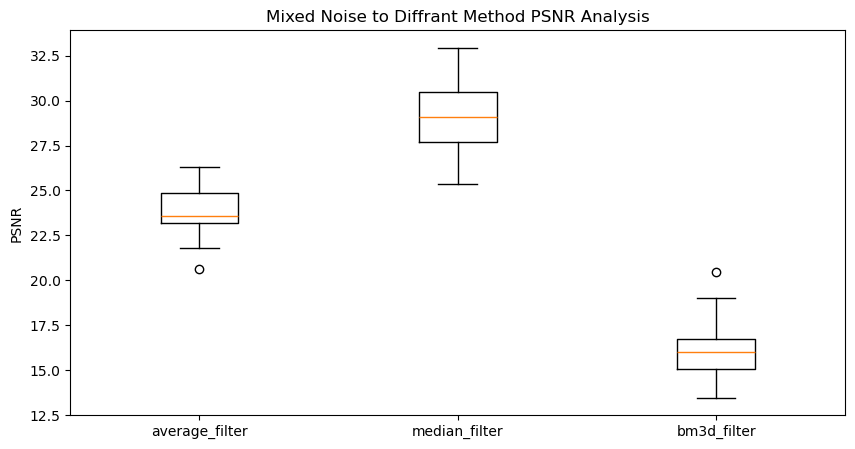

/var/folders/c8/5l_w47255q10c1x3mbbq5mvm0000gn/T/ipykernel_10882/2703437337.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([average_filter_ssim[30:], median_filter_ssim[30:], bm3d_filter_ssim[30:]],


<Figure size 640x480 with 0 Axes>

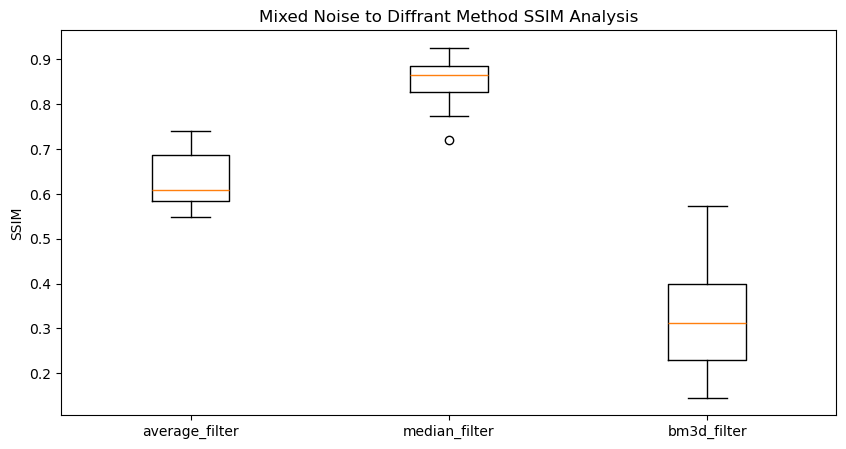

<Figure size 640x480 with 0 Axes>

In [17]:
# 混合噪声的不同降噪方法的PSNR和SSIM分析
plt.figure(figsize=(10, 5))
plt.boxplot([average_filter_psnr[30:], median_filter_psnr[30:], bm3d_filter_psnr[30:]],
            labels=['average_filter', 'median_filter', 'bm3d_filter'])
plt.title('Mixed Noise to Diffrant Method PSNR Analysis')
plt.ylabel('PSNR')
plt.show()
# 保存图片
plt.savefig('./output/Mixed Noise to Diffrant Method PSNR Analysis.png') 

plt.figure(figsize=(10, 5))
plt.boxplot([average_filter_ssim[30:], median_filter_ssim[30:], bm3d_filter_ssim[30:]],
            labels=['average_filter', 'median_filter', 'bm3d_filter'])
plt.title('Mixed Noise to Diffrant Method SSIM Analysis')   
plt.ylabel('SSIM')  
plt.show()
# 保存图片
plt.savefig('./output/Mixed Noise to Diffrant Method SSIM Analysis.png') 